In [2]:
TWITTER_APP_KEY='d3a4TFfBRgZCVPjxLv1UrPSUs'
TWITTER_APP_KEY_SECRET='RUyOEt6f8grC0Pf6brSy8AHLh73XsdWhKAr6xGhLh8yhB35CTn'
TWITTER_ACCESS_TOKEN='1398380190-hSASbmSrzYCwoWJy7e652NSXICCYdpq9bbLk2WL'
TWITTER_ACCESS_TOKEN_SECRET='ZAvLpgTBdeRw48UD8jwXcFe1fAjYzSigmrj3VzGLfvAoA'

In [5]:
from twython import Twython, TwythonError

In [6]:
t = Twython(app_key=TWITTER_APP_KEY,
            app_secret=TWITTER_APP_KEY_SECRET,
            oauth_token=TWITTER_ACCESS_TOKEN,
            oauth_token_secret=TWITTER_ACCESS_TOKEN_SECRET)

In [7]:
def get_tweets(twython_object, query, n):
    count = 0
    result_generator = twython_object.cursor(twython_object.search,q = query)
    result_set = []
    for r in result_generator:
        result_set.append(r['text'])
        count += 1
        if count == n:
            break
    return result_set

In [13]:
## Trump, Putin, Modi, Xi Jin Ping, and Boris
## english tweets, limit of 500 tweets
import simplejson as json
with open("C:\\data\\politician_tweets.json","w") as fp:
    tweets=json.load(fp)

UnsupportedOperation: not readable

In [17]:
## fresh tweets
import re
tweets={}
max_tweets = 500
tweets['trump'] = [re.sub(r'[-.#/?!,":;()\']',' ',tweet.lower())
                   for tweet in get_tweets(t,'#trump', max_tweets)]

In [28]:
tweets['putin'] = [re.sub(r'[-.#/?!,":;()\']',' ',tweet.lower())
                    for tweet in get_tweets(t,'#putin', max_tweets )]

In [19]:
tweets['modi'] = [re.sub(r'[-.#/?!,":;()\']',' ',tweet.lower())
    for tweet in get_tweets(t,'#modi', max_tweets )]

In [21]:
positive_words = open('C:/Data/positive-words.txt').read().split('\n')

In [22]:
negative_words = open('C:/Data/negative-words.txt').read().split('\n')

In [23]:
def sentiment_score(text, pos_list, neg_list):
    positive_score = 0
    negative_score = 0
        
    for w in text.split(' '):
        if w in pos_list: positive_score+=1
        if w in neg_list: negative_score+=1
    return positive_score-negative_score

In [24]:
tweets_sentiment = {}

In [25]:
tweets_sentiment['trump'] = [
    sentiment_score(tweet,positive_words,negative_words)
    for tweet in  tweets['trump'] ]

In [29]:
tweets_sentiment['putin'] = [
    sentiment_score(tweet,positive_words,negative_words)
    for tweet in tweets['putin'] ]

In [30]:
tweets_sentiment['modi'] = [
    sentiment_score(tweet,positive_words,negative_words)
    for tweet in tweets['modi'] ]

In [32]:
#tweets_sentiment['xijinping'] = [
#    sentiment_score(tweet,positive_words,negative_words)
#    for tweet in tweets['xijinping'] ]

In [33]:
import matplotlib.pyplot as plt

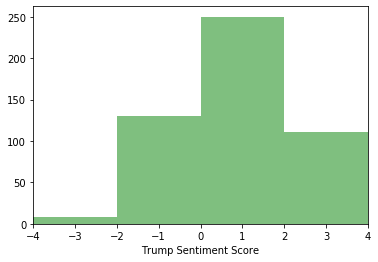

In [40]:
trump = plt.hist(tweets_sentiment['trump'],5,facecolor='green',alpha=0.5)
plt.xlabel('Trump Sentiment Score')
_=plt.xlim([-4,4])

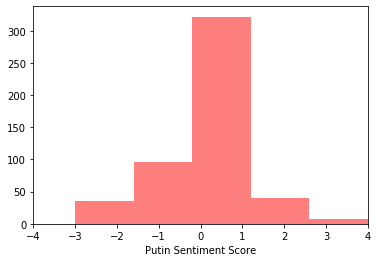

In [41]:
putin=plt.hist(tweets_sentiment['putin'],5,facecolor='red',alpha=0.5)
plt.xlabel('Putin Sentiment Score')
_=plt.xlim([-4,4])

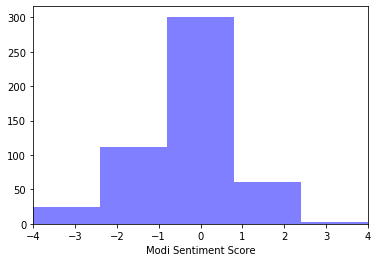

In [42]:
modi = plt.hist(tweets_sentiment['modi'], 5,facecolor='blue', alpha=0.5)
plt.xlabel('Modi Sentiment Score')
_=plt.xlim([-4,4])